### Data Exploration

Here we'll explore the cleaned and combined data from the SH Bell monitoring site in order to look for variables that can be feature engineered. Insight about feature engineering may also come from this writeup about PM10 activity at this monitoring site https://www.chicago.gov/content/dam/city/depts/cdph/InspectionsandPermitting/SHBell_VarianceRequestExhibits_4252019.pdf

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/SH_Bell/combined_meteor_and_sample.csv', index_col = 'Unnamed: 0', parse_dates=True)

In [3]:
df['Hour'] = df.index.hour
df['day'] = df.index.dayofweek
df.head()

,AWS Mph WVc,Gust Mph Max,AvgT Deg_F Avg,ABP InHg Avg,AWD_cos,AWD_sin,Sample Value,Hour,day
2017-04-01 00:00:00,5.989,15.55,38.74,29.41,0.998027,-0.062791,4.0,0,5
2017-04-01 01:00:00,5.059,11.30,39.46,29.44,0.978148,-0.207912,6.0,1,5
2017-04-01 02:00:00,5.390,11.30,39.08,29.45,0.999925,-0.012217,7.0,2,5
2017-04-01 03:00:00,5.233,11.59,38.95,29.47,0.991671,-0.128796,6.0,3,5
2017-04-01 04:00:00,3.614,8.68,38.86,29.49,0.841511,-0.540240,8.0,4,5


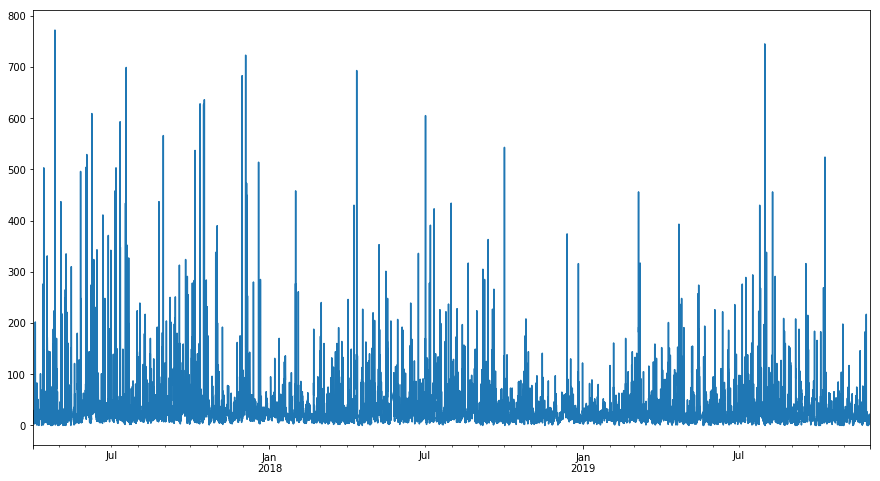

In [5]:
df['Sample Value'].plot(figsize=(15,8))

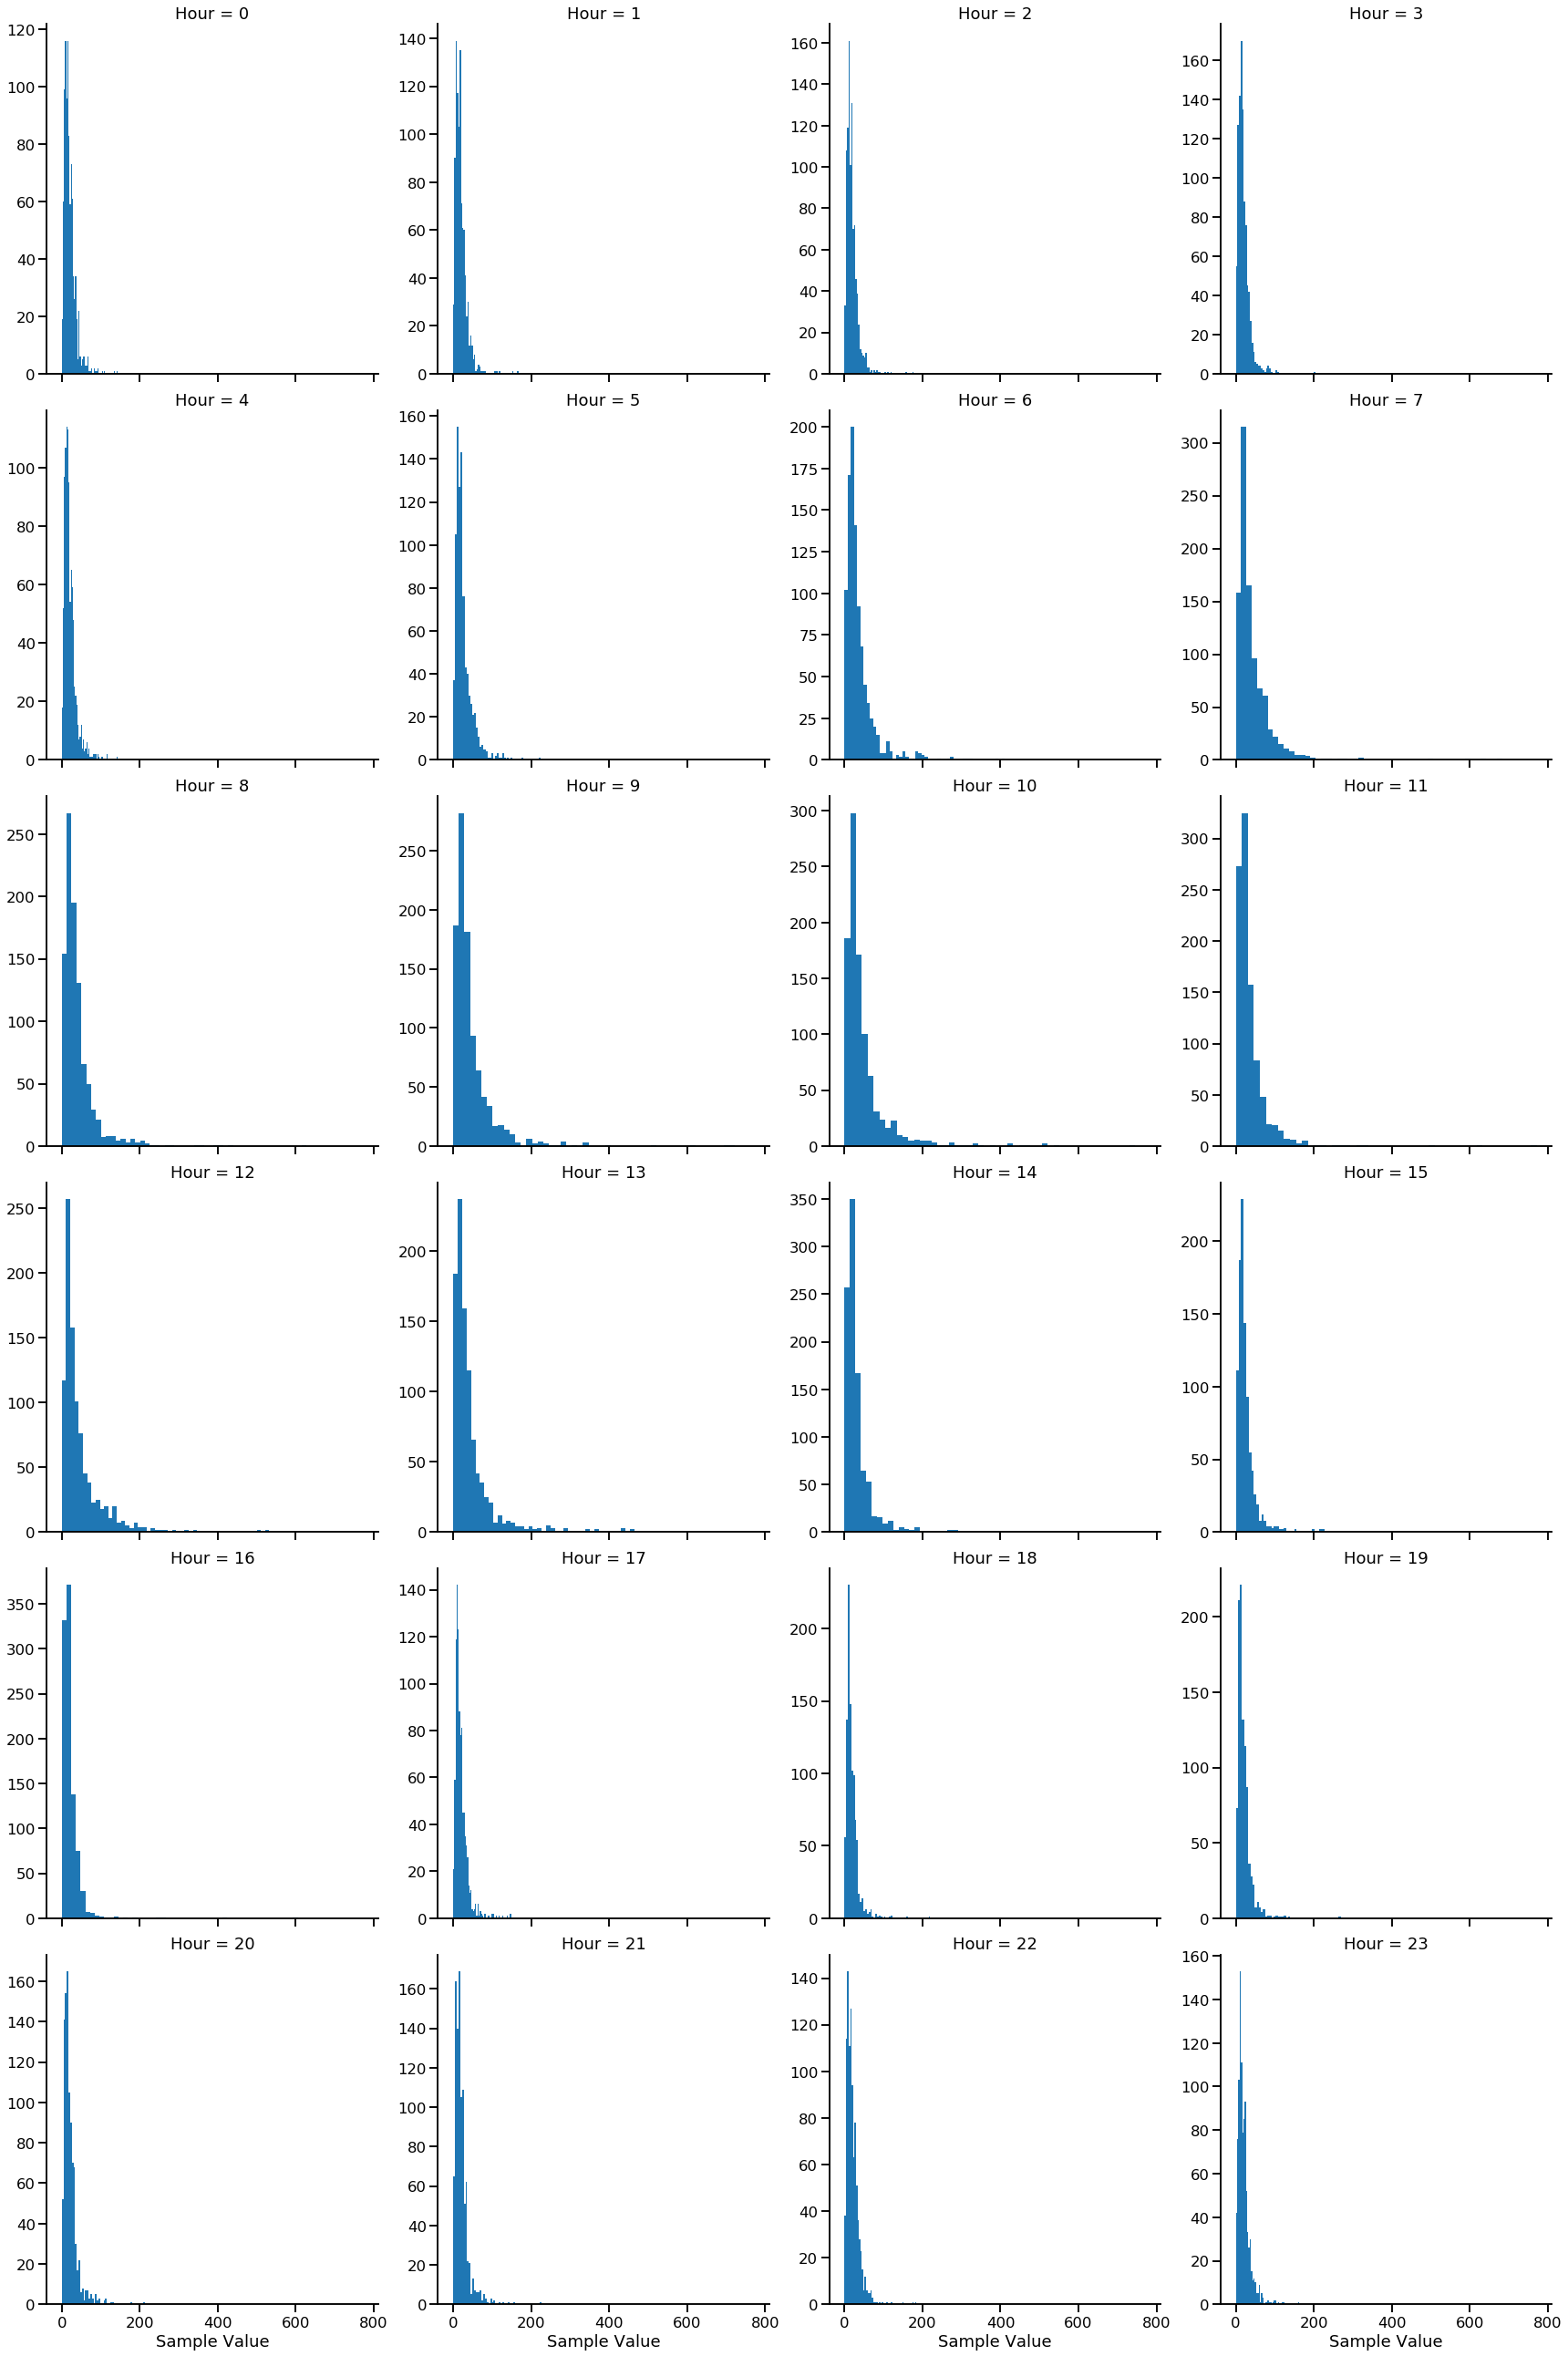

In [101]:
sns.set_context(None)
g = sns.FacetGrid(df, col='Hour', col_wrap=4, height=6, aspect=1, margin_titles=True, sharey=False)
bins=50
g.map(plt.hist, "Sample Value", bins=bins)

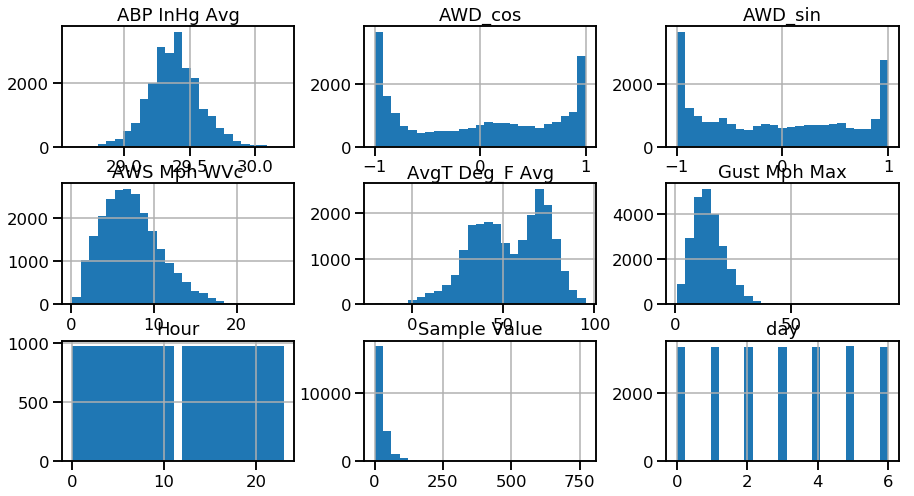

In [102]:
df.hist(figsize=(15,8), bins=25);

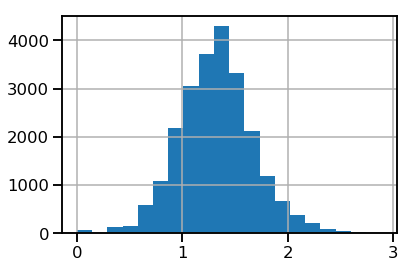

In [103]:
np.log10(df['Sample Value'] + 1).hist(bins=20)

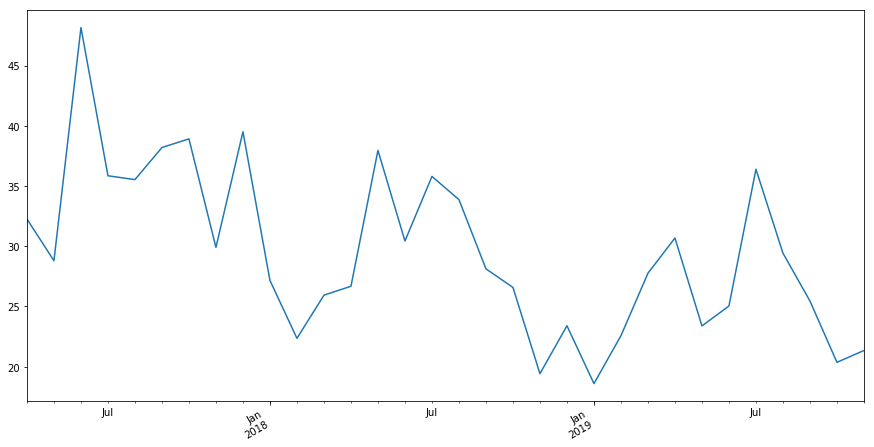

In [21]:
df['Sample Value'].resample('m').mean().plot(subplots=True, figsize=(15,8));

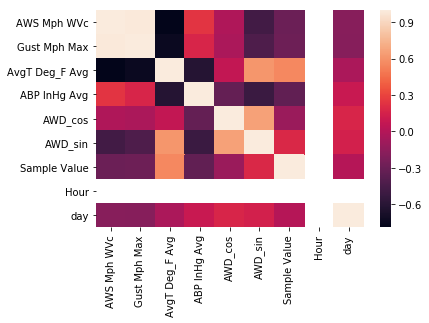

In [22]:
sns.heatmap(df.resample('m').mean().corr())

In [24]:
df.head()

,AWS Mph WVc,Gust Mph Max,AvgT Deg_F Avg,ABP InHg Avg,AWD_cos,AWD_sin,Sample Value,Hour,day
2017-04-01 00:00:00,5.989,15.55,38.74,29.41,0.998027,-0.062791,4.0,0,5
2017-04-01 01:00:00,5.059,11.30,39.46,29.44,0.978148,-0.207912,6.0,1,5
2017-04-01 02:00:00,5.390,11.30,39.08,29.45,0.999925,-0.012217,7.0,2,5
2017-04-01 03:00:00,5.233,11.59,38.95,29.47,0.991671,-0.128796,6.0,3,5
2017-04-01 04:00:00,3.614,8.68,38.86,29.49,0.841511,-0.540240,8.0,4,5


In [43]:
shift_values = df['Sample Value'].shift(-1)
shifted_df = pd.concat([df, shift_values], axis=1)
shifted_columns = shifted_df.columns.values
shifted_columns[-1] = 'Sample Value t+1'
shifted_df.columns = shifted_columns

In [51]:
shifted_df.head()

,AWS Mph WVc,Gust Mph Max,AvgT Deg_F Avg,ABP InHg Avg,AWD_cos,AWD_sin,Sample Value,Hour,day,Sample Value t+1
2017-04-01 00:00:00,5.989,15.55,38.74,29.41,0.998027,-0.062791,4.0,0,5,6.0
2017-04-01 01:00:00,5.059,11.30,39.46,29.44,0.978148,-0.207912,6.0,1,5,7.0
2017-04-01 02:00:00,5.390,11.30,39.08,29.45,0.999925,-0.012217,7.0,2,5,6.0
2017-04-01 03:00:00,5.233,11.59,38.95,29.47,0.991671,-0.128796,6.0,3,5,8.0
2017-04-01 04:00:00,3.614,8.68,38.86,29.49,0.841511,-0.540240,8.0,4,5,11.0


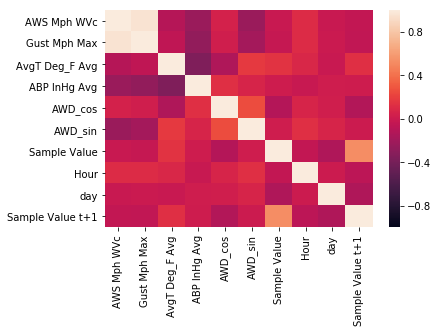

In [45]:
sns.heatmap(shifted_df.corr(), vmin=-1, vmax=1)

In [62]:
samples = []
for i in range(25):
    shifted_sample = df['Sample Value'].shift(24-i)
    shifted_sample.name = f't-{24-i}'
    samples.append(shifted_sample)
    
shifted_sample_df = pd.concat(samples, axis=1)
shifted_sample_df.head()


,t-24,t-23,t-22,t-21,t-20,t-19,t-18,t-17,t-16,t-15,...,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t-0
2017-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2017-04-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0
2017-04-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,7.0
2017-04-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,7.0,6.0
2017-04-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,6.0,7.0,6.0,8.0


In [64]:
shifted_sample_df.corr()

,t-24,t-23,t-22,t-21,t-20,t-19,t-18,t-17,t-16,t-15,...,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t-0
t-24,1.000000,0.527774,0.391821,0.348117,0.262833,0.201057,0.161482,0.112594,0.073173,0.050471,...,0.015832,0.030266,0.052637,0.074744,0.098720,0.133761,0.161093,0.177982,0.196162,0.221346
t-23,0.527774,1.000000,0.527778,0.391824,0.348119,0.262837,0.201062,0.161488,0.112597,0.073177,...,0.014190,0.015842,0.030275,0.052645,0.074750,0.098727,0.133769,0.161101,0.177990,0.196171
t-22,0.391821,0.527778,1.000000,0.527780,0.391826,0.348123,0.262842,0.201068,0.161491,0.112602,...,0.017724,0.014201,0.015853,0.030285,0.052653,0.074759,0.098736,0.133779,0.161111,0.178001
t-21,0.348117,0.391824,0.527780,1.000000,0.527781,0.391829,0.348126,0.262845,0.201070,0.161494,...,0.016302,0.017731,0.014208,0.015859,0.030290,0.052659,0.074765,0.098743,0.133785,0.161118
t-20,0.262833,0.348119,0.391826,0.527781,1.000000,0.527782,0.391830,0.348128,0.262847,0.201072,...,0.027243,0.016307,0.017736,0.014212,0.015863,0.030294,0.052663,0.074769,0.098747,0.133789
t-19,0.201057,0.262837,0.348123,0.391829,0.527782,1.000000,0.527785,0.391834,0.348130,0.262850,...,0.037630,0.027251,0.016315,0.017743,0.014218,0.015870,0.030302,0.052671,0.074778,0.098756
t-18,0.161482,0.201062,0.262842,0.348126,0.391830,0.527785,1.000000,0.527788,0.391836,0.348133,...,0.050498,0.037638,0.027259,0.016323,0.017749,0.014226,0.015878,0.030310,0.052679,0.074787
t-17,0.112594,0.161488,0.201068,0.262845,0.348128,0.391834,0.527788,1.000000,0.527789,0.391838,...,0.073205,0.050508,0.037647,0.027268,0.016330,0.017758,0.014235,0.015887,0.030320,0.052691
t-16,0.073173,0.112597,0.161491,0.201070,0.262847,0.348130,0.391836,0.527789,1.000000,0.527790,...,0.112625,0.073210,0.050513,0.037652,0.027272,0.016335,0.017763,0.014240,0.015894,0.030327
t-15,0.050471,0.073177,0.112602,0.161494,0.201072,0.262850,0.348133,0.391838,0.527790,1.000000,...,0.161516,0.112630,0.073215,0.050518,0.037657,0.027277,0.016340,0.017769,0.014247,0.015901


In [106]:
sns.set_context('talk')

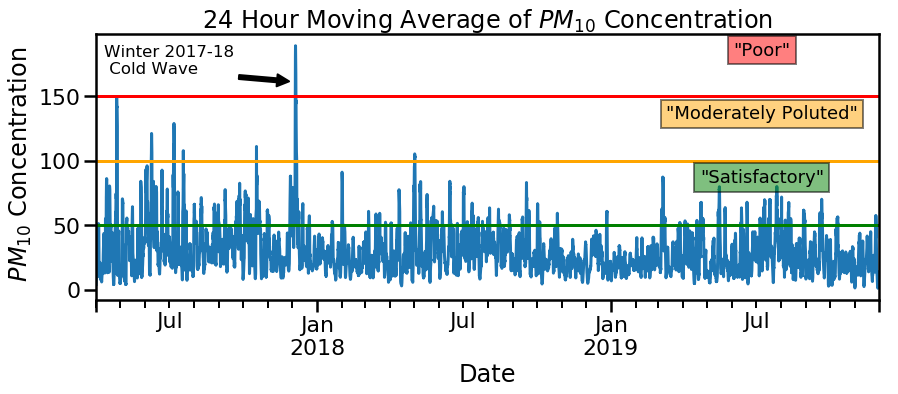

In [210]:
ax = df['Sample Value'].rolling('24h').mean().plot(figsize=(13,6))
ax.set_title(r'24 Hour Moving Average of $PM_{10}$ Concentration')
ax.set_ylabel(r' $PM_{10}$ Concentration')
ax.set_xlabel('Date')
plt.axhline(y=50, color='g')
plt.axhline(y=100, color='orange')
plt.axhline(y=150, color='r')
# plt.annotate('Winter 2018-19 North American Cold Wave',
#              xy=(5,5),
#              xytext=(8, 8),
#              arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3")
#             )
ax.annotate('Winter 2017-18\n Cold Wave', 
            xycoords='axes fraction',
            xy=(0.25, 0.82), xytext=(0.01, 0.85),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize='x-small'
            )

prop1 = dict(boxstyle='square', facecolor='green', alpha=0.5)
prop2 = dict(boxstyle='square', facecolor='orange', alpha=0.5)
prop3 = dict(boxstyle='square', facecolor='red', alpha=0.5)

ax.text(0.85, 0.44, '"Satisfactory"', transform=ax.transAxes, fontsize=18,
        horizontalalignment='center', bbox=prop1)
ax.text(0.85, 0.68, '"Moderately Poluted"', transform=ax.transAxes, fontsize=18,
        horizontalalignment='center', bbox=prop2)
ax.text(0.85, 0.92, '"Poor"', transform=ax.transAxes, fontsize=18,
        horizontalalignment='center', bbox=prop3)

plt.tight_layout()

plt.savefig('./presentation_figures/24h_average.png')

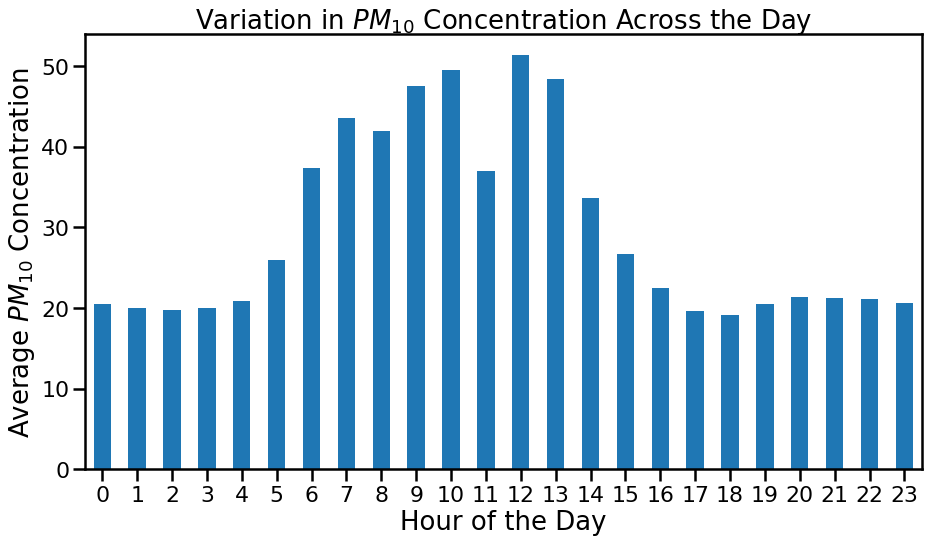

In [200]:
sns.set_context('poster')
plt.figure(figsize=(15,8))
df.groupby('Hour').mean()['Sample Value'].plot(kind='bar')
plt.ylabel(r'Average $PM_{10}$ Concentration', fontsize=26)
plt.xlabel(r'Hour of the Day', fontsize=26)
plt.title(r'Variation in $PM_{10}$ Concentration Across the Day', fontsize=26)
plt.xticks(rotation=0);
plt.savefig('./presentation_figures/pm10_variation_day.png')

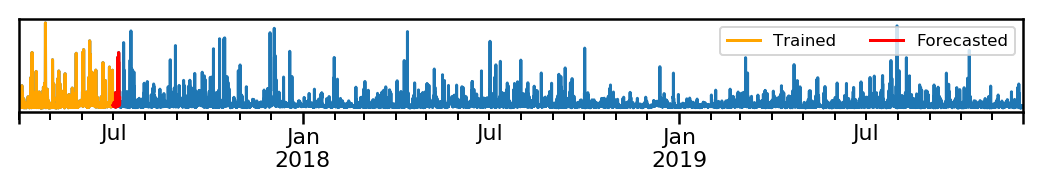

In [258]:
fig, ax = plt.subplots(figsize=(15,3))

df['Sample Value'].plot(ax=ax, xticks=[], yticks=[], label='')
df['Sample Value'][:'2017-07-01'].plot(ax=ax, color='orange', label='Trained')
df['Sample Value']['2017-07-01':'2017-07-07 12:00:00'].plot(ax=ax, color='red', label='Forecasted')
ax.legend(ncol=2, fontsize='x-small')
plt.tight_layout()
plt.savefig('./presentation_figures/testfig.png')

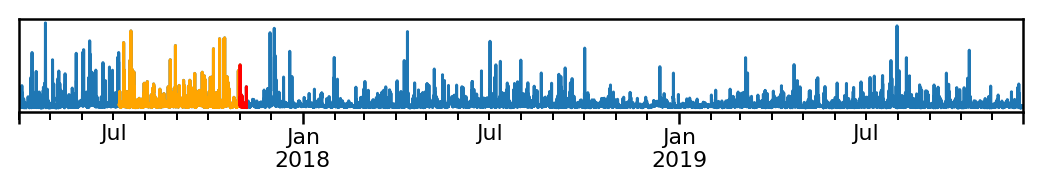

In [260]:
fig, ax = plt.subplots(figsize=(15,3))

df['Sample Value'].plot(ax=ax, xticks=[], yticks=[], label='')
df['Sample Value']['2017-07-07':'2017-11-01'].plot(ax=ax, color='orange', label='Trained')
df['Sample Value']['2017-11-01':'2017-11-07 12:00:00'].plot(ax=ax, color='red', label='Forecasted')
plt.tight_layout()
plt.savefig('./presentation_figures/testfig2.png')

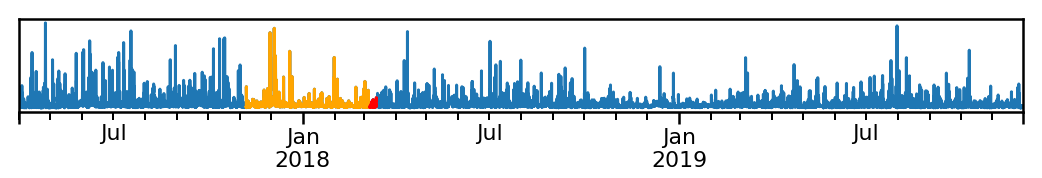

In [261]:
fig, ax = plt.subplots(figsize=(15,3))

df['Sample Value'].plot(ax=ax, xticks=[], yticks=[], label='')
df['Sample Value']['2017-11-07':'2018-03-07'].plot(ax=ax, color='orange', label='Trained')
df['Sample Value']['2018-03-07':'2018-03-13 12:00:00'].plot(ax=ax, color='red', label='Forecasted')
plt.tight_layout()
plt.savefig('./presentation_figures/testfig3.png')

In [ ]:
fig, ax = plt.subplots(figsize=(15,2))

df['Sample Value'].plot(ax=ax, xticks=[], yticks=[])
df['Sample Value'][:'2017-07-01'].plot(ax=ax, color='orange', label='Trained')
df['Sample Value']['2017-07-01':'2017-07-07 12:00:00'].plot(ax=ax, color='red', label='Forecasted')
plt.savefig('./presentation_figures/testfig.png')